<a href="https://colab.research.google.com/github/HuiningLiu02/TIF360-Advanced-machine-learning-with-neural-networks/blob/main/Ch03_CNN/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying mnist with a Convolutional Neural Network



In [1]:
!pip install deeplay  # Uncomment if using Colab/Kaggle.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/177.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

This notebook provides you with a complete code example that loads the malaria dataset, trains a convolutional neural network with dense top to classify the images of cells with and without malaria, analyzes where the trained network fails, and shows the network activations and heatmaps.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 3-A from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading the MNIST Dataset

In [2]:
import os

if not os.path.exists("MNIST_dataset"):
    os.system("git clone https://github.com/DeepTrackAI/MNIST_dataset")

train_path = os.path.join("MNIST_dataset", "mnist", "train")
train_image_files = sorted(os.listdir(train_path))

In [32]:
import matplotlib.pyplot as plt
import deeplay as dl
train_path = os.path.join("MNIST_dataset", "mnist", "train")
train_image_files = sorted(os.listdir(train_path))

train_images = []
for file in train_image_files:
    image = plt.imread(os.path.join(train_path, file))
    image = torch.tensor(image)
    train_images.append(image)


train_digits = []
for file in train_image_files:
    filename = os.path.basename(file)
    digit = int(filename[0])
    digit_one_hot = torch.nn.functional.one_hot(torch.tensor(digit), num_classes=10).float()
    train_digits.append(digit_one_hot)

train_images_digits = list(zip(train_images, train_digits))

# **创建 DataLoader**
train_dataloader = dl.DataLoader(train_images_digits, batch_size=32, shuffle=True)

In [33]:
# 检查列表中第一个元素的类型
print(type(train_images[0]))
print(type(train_digits[0]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [34]:
# **测试 DataLoader**
images, labels = next(iter(train_dataloader))
print("Image tensor shape:", images.shape)  # (32, 28, 28) 或 (32, 1, 28, 28)
print("Label tensor shape:", labels.shape)  # (32, 10)

Image tensor shape: torch.Size([32, 28, 28])
Label tensor shape: torch.Size([32, 10])


In [11]:
test_path = os.path.join("MNIST_dataset", "mnist", "test")
test_image_files = sorted(os.listdir(test_path))

test_images = []
for file in test_image_files:
    image = plt.imread(os.path.join(test_path, file))
    test_images.append(image)

test_digits = []
for file in test_image_files:
    filename = os.path.basename(file)
    digit = int(filename[0])
    test_digits.append(digit)
test_images_digits = list(zip(test_images, test_digits))
test_dataloader = dl.DataLoader(test_images_digits, batch_size=256, shuffle=False)

### Visualizing the data



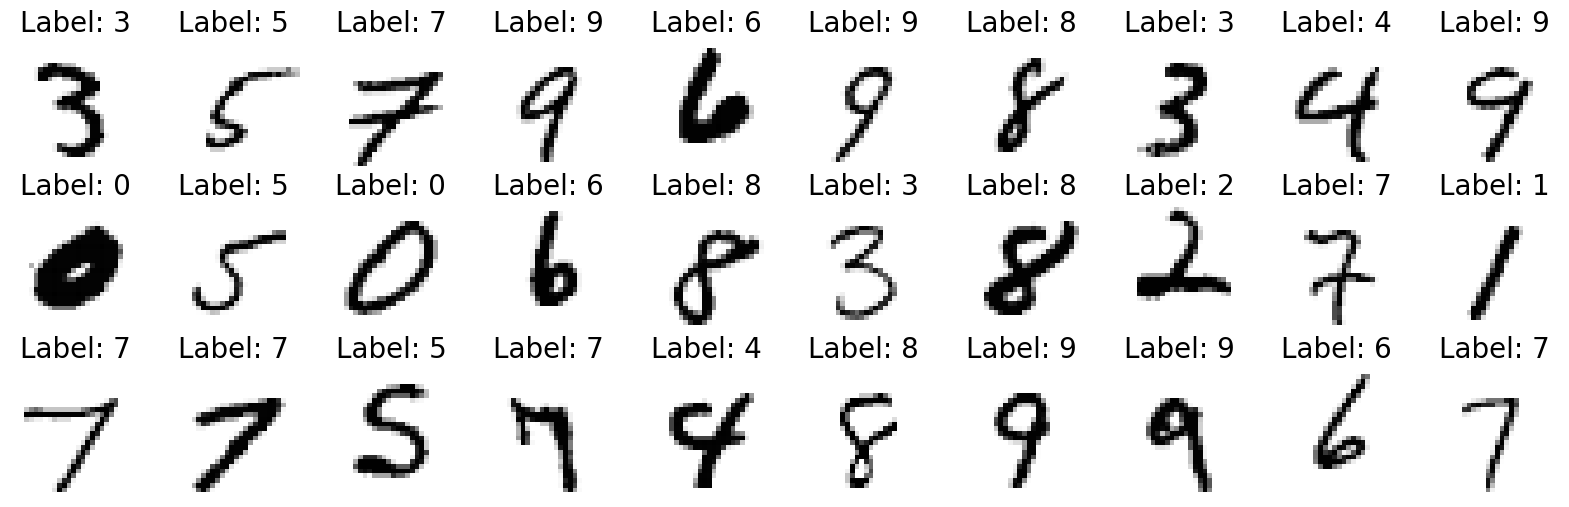

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(20, 6))
for ax in axs.ravel():
    idx_image = np.random.choice(60000)
    ax.imshow(train_images[idx_image], cmap="Greys")
    ax.set_title(f"Label: {train_digits[idx_image]}", fontsize=20)
    ax.axis("off")
plt.show()

## Classifying the MNIST with Convolutional Neural Networks

Implement a convolutional neural network with a dense top ...

In [ ]:
conv_base = dl.ConvolutionalNeuralNetwork(
    in_channels=3, hidden_channels=[16, 16, 32], out_channels=32,
)
conv_base.blocks[2].pool.configure(torch.nn.MaxPool2d, kernel_size=2)

connector = dl.Layer(torch.nn.AdaptiveAvgPool2d, output_size=1)

dense_top = dl.MultiLayerPerceptron(
    in_features=32, hidden_features=[], out_features=1,
    out_activation=torch.nn.Sigmoid,
)

cnn = dl.Sequential(conv_base, connector, dense_top)

... print out its detailed architecture ...

In [ ]:
print(cnn)

Sequential(
  (0): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (3): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[Identity]()
      )
    )
  )
  (1): Layer[AdaptiveAvgPool2d](output_size=1)
  (2): MultiLayerPerceptron(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=1, bias=Tr

... compile it ...

In [ ]:
cnn_classifier = dl.BinaryClassifier(
    model=cnn, optimizer=dl.RMSprop(lr=0.001),
).create()

... and print out the compiled convolutional neural network.

In [ ]:
print(cnn_classifier)

BinaryClassifier(
  (loss): BCELoss()
  (train_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=test
  )
  (model): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (blocks): LayerList(
        (0): Conv2dBlock(
          (layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (1): Conv2dBlock(
          (layer): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (2): Conv2dBlock(
          (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (layer): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (3): Conv2dBlock(
          (la

### Training the Convolutional Neural Network

In [ ]:
cnn_trainer = dl.Trainer(max_epochs=5, accelerator="auto")
cnn_trainer.fit(cnn_classifier, train_loader)

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_book/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ loss          │ BCELoss          │      0 │ train │
│ 1 │ train_metrics │ MetricCollection │      0 │ train │
│ 2 │ val_metrics   │ MetricCollection │      0 │ train │
│ 3 │ test_metrics  │ MetricCollection │      0 │ train │
│ 4 │ model         │ Sequential       │ 16.7 K │ train │
│ 5 │ optimizer     │ RMSprop          │      0 │ train │
└───┴───────────────┴──────────────────┴────────┴───────┘

Trainable params: 16.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 16.7 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 30                                                                                          
Modules in eval mode: 0

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_book/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


### Testing the Convolutional Neural Network

In [ ]:
cnn_trainer.test(cnn_classifier, test_loader)

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_book/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testBinaryAccuracy_epoch  │     0.945926308631897     │
│      test_loss_epoch      │    0.16218945384025574    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 0.16218945384025574,
  'testBinaryAccuracy_epoch': 0.945926308631897}]

### Plotting the ROC Curve

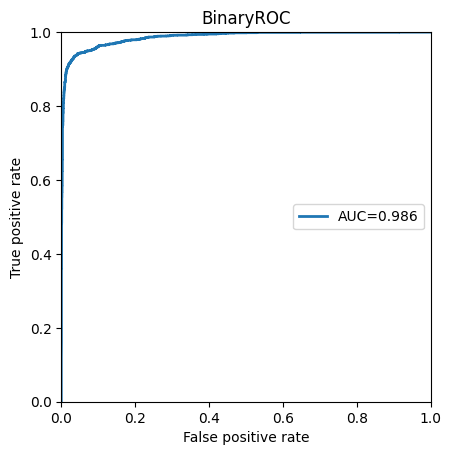

In [ ]:
plot_roc(cnn_classifier, test_loader)

### Checking the Values of the Filters

The following code accesses the 32nd filter's weights in the first convolutional layer of the CNN. It navigates through the model's first module (`model[0]`), selects the initial block (`blocks[0]`), and then targets the layer's weights (`layer.weight[15]`).

In [ ]:
filter = cnn_classifier.model[0].blocks[0].layer.weight[15]

print(filter)

tensor([[[-0.1672, -0.0741, -0.0677],
         [ 0.0300, -0.1818, -0.0268],
         [-0.1737,  0.1632, -0.1260]],

        [[ 0.0689,  0.1426,  0.1388],
         [ 0.2442,  0.2061, -0.0132],
         [ 0.2497,  0.1924, -0.0084]],

        [[ 0.0116, -0.0199,  0.0772],
         [-0.1061, -0.0225, -0.1476],
         [ 0.0322,  0.1279,  0.0708]]], grad_fn=<SelectBackward0>)


### Visualizing the Activations of the Convolutional Layers

Pick the image of an infected smear to then check the activations it produces on the last convolutional layer ...

In [ ]:
from PIL import Image

im_ind = 0
image_filename = dataset.samples[im_ind][0]
image_hr = Image.open(image_filename)
image = image_trans(image_hr)

... verify whether this image is of a parasitized cell ...

In [ ]:
print(label_trans(dataset.targets[im_ind]))

tensor([1.])


... define a function to visualize the activations ...

In [ ]:
def plot_activations(activations, cols=8):
    """Visualize activations."""
    rows = -(activations.shape[0] // -cols)

    fig, axs = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    for i, ax in enumerate(axs.ravel()):
        ax.axis("off")
        if i < activations.shape[0]:
            ax.imshow(activations[i].numpy())
            ax.set_title(i, fontsize=16)
    plt.show()

... add a hook to access the activations in the forward pass ...


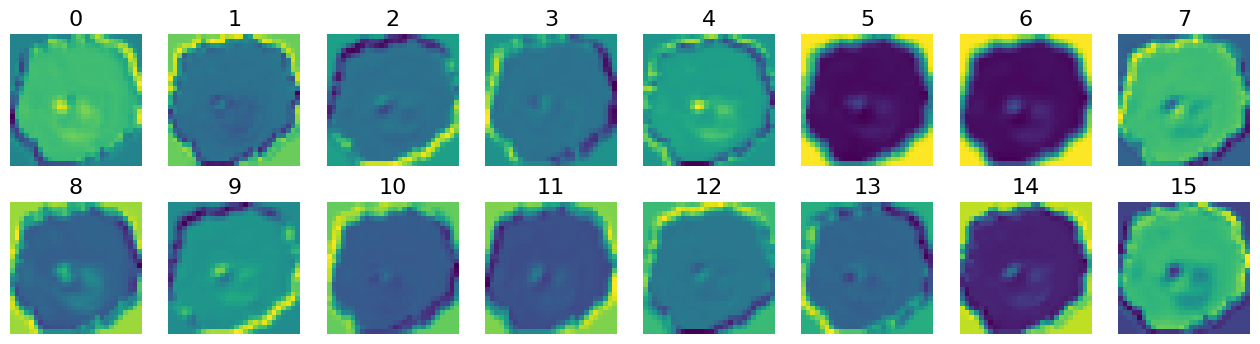

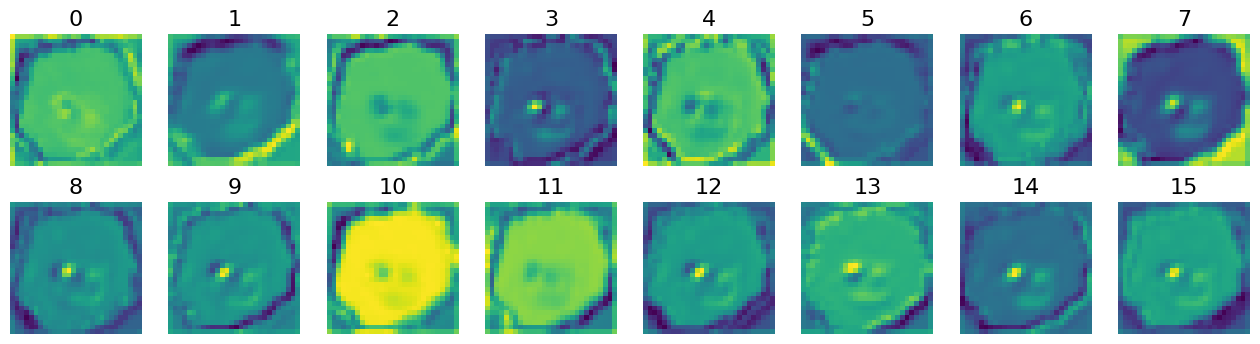

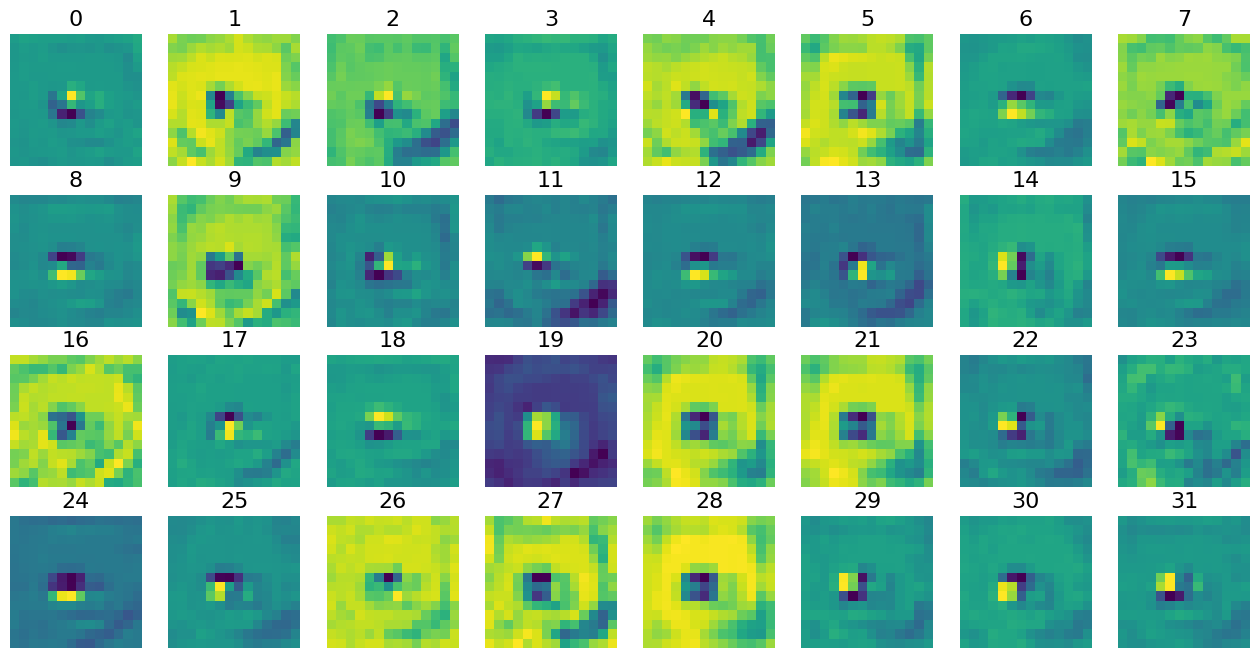

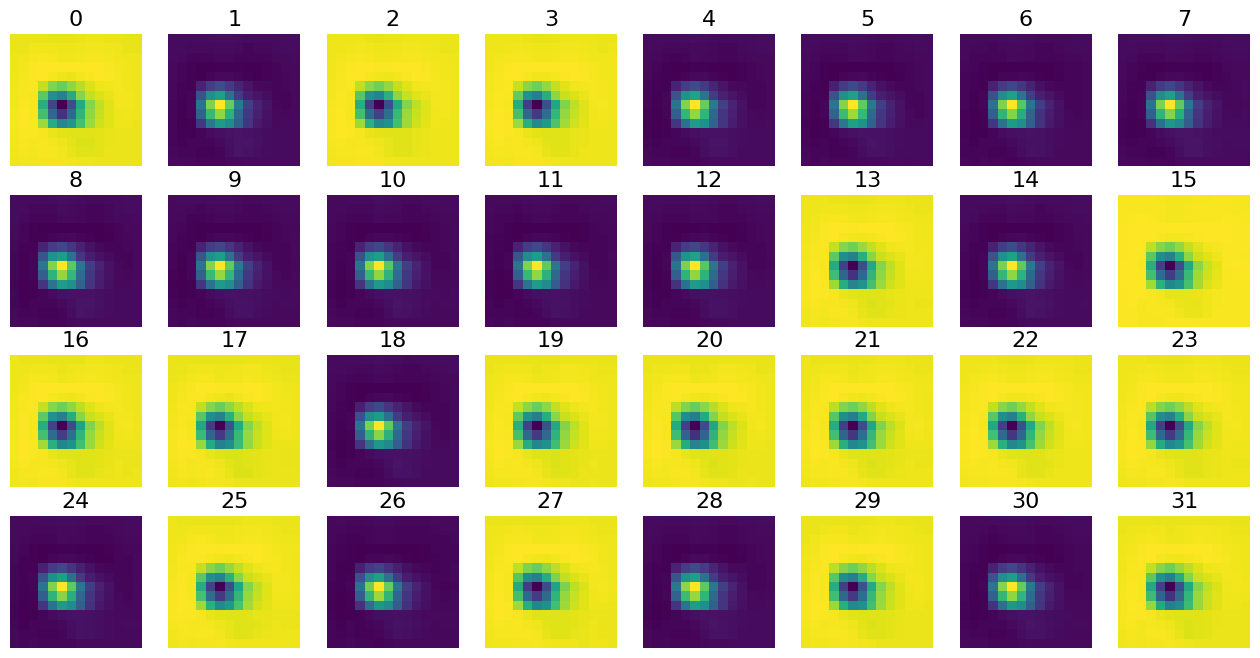

In [ ]:
def hook_func(layer, input, output):
    """Hook for activations."""
    activations = output.detach().clone()
    plot_activations(activations[0])

for block in cnn_classifier.model[0].blocks:
    layer = block.layer
    handle_hook = layer.register_forward_hook(hook_func)

    try:
        pred = cnn_classifier.model(image.unsqueeze(0))
    except Exception as e:
        print(f"An error occurred during model prediction: {e}")
    finally:
        handle_hook.remove()

### Visualizing the Heatmaps

Use hooks to keep tracks also of the gradients in the backward pass ...

In [ ]:
hookdata = {}

def fwd_hook_func(layer, input, output):
    """Forward hook function."""
    hookdata["activations"] = output.detach().clone()

def bwd_hook_func(layer, grad_input, grad_output):
    """Backward hook function."""
    hookdata["gradients"] = grad_output[0].detach().clone()

layer = cnn_classifier.model[0].blocks[3].layer
handle_fwd_hook = layer.register_forward_hook(fwd_hook_func)
handle_bwd_hook = layer.register_full_backward_hook(bwd_hook_func)

try:
    pred = cnn_classifier.model(image.unsqueeze(0))
    pred.sum().backward()
except Exception as e:
    print(f"An error occurred during model prediction: {e}")
finally:
    handle_fwd_hook.remove()
    handle_bwd_hook.remove()

... calculate the heatmap combining activations and gradients ...

In [ ]:
from torch.nn.functional import relu

activations = hookdata["activations"][0]
gradients = hookdata["gradients"][0]

pooled_gradients = gradients.mean(dim=[1, 2], keepdim=True)
heatmap = relu((pooled_gradients * activations).sum(0)).detach().numpy()

... and plot the heatmap.

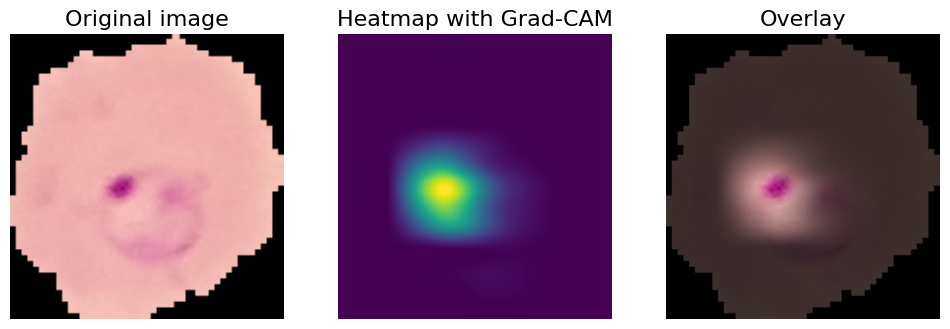

In [ ]:
from numpy import array
from skimage.exposure import rescale_intensity
from skimage.transform import resize

rescaled_image = rescale_intensity(array(image_hr), out_range=(0, 1))
resized_heatmap = resize(heatmap, rescaled_image.shape, order=2)
rescaled_heatmap = rescale_intensity(resized_heatmap, out_range=(0.25, 1))

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(rescaled_image, interpolation="bilinear")
plt.title("Original image", fontsize=16)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rescaled_heatmap.mean(axis=-1), interpolation="bilinear")
plt.title("Heatmap with Grad-CAM", fontsize=16)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rescaled_image * rescaled_heatmap)
plt.title("Overlay", fontsize=16)
plt.axis("off")

plt.show()